<a href="https://colab.research.google.com/github/caltunay/web_tracking_accuracy/blob/master/Web_tracking_accuracy_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Web tracking accuracy analysis</b></h1>

---

In [0]:
# import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# save path for web tracking and pos CSV files

pos_path = '/content/drive/My Drive/catch/source_of_truth_order_report.csv'
web_path = '/content/drive/My Drive/catch/website_order_tracking.csv'

In [0]:
# save CSVs as DataFrames 

pos = pd.read_csv(pos_path)
web = pd.read_csv(web_path)

In [0]:
print(" POS set number of rows & columns: ", pos.shape, '\n', "Web tracking number of rows and columns: ",  web.shape)

 POS set number of rows & columns:  (858031, 6) 
 Web tracking number of rows and columns:  (841658, 9)


In [0]:
# look at random samples of both dataframes
pos.sample(3)

,date,order_id,customer_platform,payment_method,product_id,product_name
304793,2019-09-09,27584411,Mobile Web--iPad,Stripe,4623235,iPEGA PG - 9023S Bluetooth Stretchable Control...
175401,2019-09-04,27514969,Web--Google Shopping,Stripe,3954311,Sports Silicone Bracelet wrist band For Apple ...
348975,2019-09-01,27467996,Mobile Web--iPhone--Google Shopping,Stripe,3737652,LEGO® Duplo Cargo Train Building Set


In [0]:
web.sample(3)

,date,br_name,br_family,br_version,br_type,os_name,os_family,product_id,order_id
726897,20/08/2019,Chrome,Chrome,75.0.3770.142,Browser,Mac OS X,Mac OS X,3817465,27305525.0
574475,22/08/2019,Safari 11,Safari,11.1.2,Browser,Mac OS X,Mac OS X,498399,27338415.0
226836,23/08/2019,Chrome Mobile,Chrome,76.0.3809.111,Browser (mobile),Android 8.x,Android,1749604,27352729.0


In [0]:
# looking at data types
pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858031 entries, 0 to 858030
Data columns (total 6 columns):
date                 858031 non-null object
order_id             858031 non-null int64
customer_platform    858031 non-null object
payment_method       858031 non-null object
product_id           858031 non-null int64
product_name         858031 non-null object
dtypes: int64(2), object(4)
memory usage: 39.3+ MB


In [0]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841658 entries, 0 to 841657
Data columns (total 9 columns):
date          841658 non-null object
br_name       841658 non-null object
br_family     841658 non-null object
br_version    813461 non-null object
br_type       841658 non-null object
os_name       841658 non-null object
os_family     841658 non-null object
product_id    841658 non-null int64
order_id      841626 non-null float64
dtypes: float64(1), int64(1), object(7)
memory usage: 57.8+ MB


<h4><b> Datasets are by order line.  Will join tables on a composite key order_id + product_id. Also will change datatype of 'date' column to datetime</b> </h4>
   



In [0]:
# change date column type to datetime
pos['date'] = pd.to_datetime(pos['date'], yearfirst = True)
web['date'] = pd.to_datetime(web['date'], dayfirst = True)

print(pos.info(), '\n', web.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858031 entries, 0 to 858030
Data columns (total 6 columns):
date                 858031 non-null datetime64[ns]
order_id             858031 non-null int64
customer_platform    858031 non-null object
payment_method       858031 non-null object
product_id           858031 non-null int64
product_name         858031 non-null object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 39.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841658 entries, 0 to 841657
Data columns (total 9 columns):
date          841658 non-null datetime64[ns]
br_name       841658 non-null object
br_family     841658 non-null object
br_version    813461 non-null object
br_type       841658 non-null object
os_name       841658 non-null object
os_family     841658 non-null object
product_id    841658 non-null int64
order_id      841626 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 57.8+ MB
None 
 None


In [0]:
# create composite_key from order_id and product_id, instead of joining on multiple columns; 
# to easily compare partially cancelled orders (if there are any), 
# against orders that do not exist in 'source of truth'

# order_id in web is float datatype,  change that to int64
web['order_id'] = web['order_id'].values.astype(np.int64)
print(web.sample(2))
print(web.info())

             date        br_name br_family  ... os_family product_id  order_id
149468 2019-09-17  Chrome Mobile    Chrome  ...   Android    2394768  27684149
249954 2019-09-20         Chrome    Chrome  ...  Mac OS X    3759737  27726214

[2 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841658 entries, 0 to 841657
Data columns (total 9 columns):
date          841658 non-null datetime64[ns]
br_name       841658 non-null object
br_family     841658 non-null object
br_version    813461 non-null object
br_type       841658 non-null object
os_name       841658 non-null object
os_family     841658 non-null object
product_id    841658 non-null int64
order_id      841658 non-null int64
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 57.8+ MB
None


In [0]:
# generate composite key per order line in both dataframes
pos['composite_key'] = pos['order_id'].map(str) + pos['product_id'].map(str)
web['composite_key'] = web['order_id'].map(str) + web['product_id'].map(str)

In [0]:
# will filter web for true and false orders, group by date and see accuracy over time

# true orders as list
true_order_lines = pos['composite_key'].tolist()

# slice and save web dataframe for true orders and false orders
correct_tracked_orders = web[web['composite_key'].isin(true_order_lines)]
false_tracked_orders = web[~web['composite_key'].isin(true_order_lines)]

print("Accurately tracked order line count: ", len(correct_tracked_orders),"\nInaccurately tracked order line count: ", len(false_tracked_orders))

Accurately tracked order line count:  838206 
Inaccurately tracked order line count:  3452


In [0]:
# group correct and false tracked orders by date 
correct_orders_bydate = correct_tracked_orders.groupby('date', as_index = False).agg({'composite_key':'count'}).rename(columns={'composite_key':'correct_tracked_lines'})
false_orders_bydate = false_tracked_orders.groupby('date', as_index = False).agg({'composite_key':'count'}).rename(columns={'composite_key':'false_tracked_lines'})

# join on date
accuracy_bydate = pd.merge(left = correct_orders_bydate, right = false_orders_bydate, how = 'inner', on = 'date', suffixes = ('_correct_orders','_false_orders'))

# create daily accuracy column
accuracy_bydate['accuracy'] = accuracy_bydate['correct_tracked_lines'] / (accuracy_bydate['correct_tracked_lines'] + accuracy_bydate['false_tracked_lines'] )


accuracy_bydate

,date,correct_tracked_lines,false_tracked_lines,accuracy
0,2019-08-01,11700,228,0.980885
1,2019-08-02,14628,125,0.991527
2,2019-08-03,14266,66,0.995395
3,2019-08-04,17265,88,0.994929
4,2019-08-05,15781,99,0.993766
5,2019-08-06,15398,64,0.995861
6,2019-08-07,16058,42,0.997391
7,2019-08-08,15308,41,0.997329
8,2019-08-09,14224,41,0.997126
9,2019-08-10,15562,56,0.996414


In [0]:
# 2019-09-23 seems incomplete, will dump that day

accuracy_bydate.drop(index = 53, inplace = True)

<h4><b> Visualization of accuracy over time</b> </h4>
   



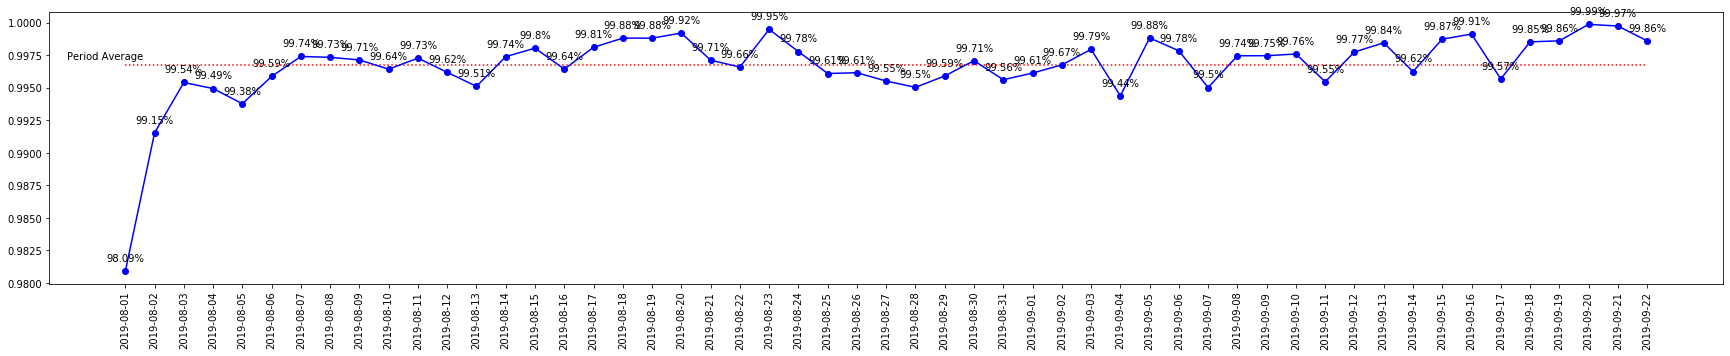

In [0]:
# magic command for visualisation
%matplotlib inline

# average accuracy for given period, to be used in graph
period_avg = accuracy_bydate['correct_tracked_lines'].sum() / (accuracy_bydate['correct_tracked_lines'].sum() + accuracy_bydate['false_tracked_lines'].sum())

# create figure and ax
plt.figure(figsize=(30,5))
ax = plt.plot(accuracy_bydate['date'], accuracy_bydate['accuracy'],'bo-')

# create and place datalabels for each date
for x,y in zip(accuracy_bydate['date'], accuracy_bydate['accuracy']):
    
    # create labels by rounding and placing % sign
    label = str(round(y*100,2)) + '%'
    
    # place datalabels by leveraging annotate
    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center') 

# create horizontal line and explanation, to see period average accuracy visually 
plt.hlines(y = period_avg, xmin = accuracy_bydate['date'].min(), xmax = accuracy_bydate['date'].max() , linestyles = 'dotted', colors = 'r')
plt.text(x = '2019-07-30', y = .9972, s ='Period Average')

# rotate dates on x axis and tick at each date
plt.xticks(ticks=accuracy_bydate['date'].values,rotation = 'vertical')
plt.show();

<h4><b> Accuracy was lower in early August compared to rest of the period. Will get days with tracking accuracy lower and higher than average; and see if anything stands out between those</b> </h4>
   



In [0]:

accuracy_bydate['accuracy_performance'] = np.where(accuracy_bydate['accuracy'] < period_avg, "below_avg", "above_avg")
accuracy_bydate

,date,correct_tracked_lines,false_tracked_lines,accuracy,accuracy_performance
0,2019-08-01,11700,228,0.980885,below_avg
1,2019-08-02,14628,125,0.991527,below_avg
2,2019-08-03,14266,66,0.995395,below_avg
3,2019-08-04,17265,88,0.994929,below_avg
4,2019-08-05,15781,99,0.993766,below_avg
5,2019-08-06,15398,64,0.995861,below_avg
6,2019-08-07,16058,42,0.997391,above_avg
7,2019-08-08,15308,41,0.997329,above_avg
8,2019-08-09,14224,41,0.997126,above_avg
9,2019-08-10,15562,56,0.996414,below_avg


In [0]:
# get dates for both sides in list
below_avg_dates = accuracy_bydate[accuracy_bydate['accuracy_performance'] == 'below_avg']['date'].dt.strftime('%Y-%m-%d').tolist()
above_avg_dates = accuracy_bydate[accuracy_bydate['accuracy_performance'] == 'above_avg']['date'].dt.strftime('%Y-%m-%d').tolist()

# slice main web dataframe for both sides of accuracy threshold by dates, and get mean of daily orders given  
print('Daily average orders in dates where accuracy is above avg: ', 
      web[web['date'].isin(above_avg_dates)].groupby('date').agg({'order_id':'nunique'}).mean()[0],
      '\nDaily average orders in dates where accuracy is below avg: ',
      web[web['date'].isin(below_avg_dates)].groupby('date').agg({'order_id':'nunique'}).mean()[0])

Daily average orders in dates where accuracy is above avg:  7664.689655172414 
Daily average orders in dates where accuracy is below avg:  7759.583333333333


<h4><b> Daily average order number is very close, regardless of that days' tracking accuracy. </b> </h4>
<h4><b> Will see average number of different SKUs in each basket for accurately and inaccurately tracked . </b> </h4>
   
   



In [0]:
print("Average products in basket for accurately tracked ones: ",
      correct_tracked_orders.groupby('order_id').agg({'product_id':'count'}).mean()[0],
      "\nAverage products in basket for inaccurately tracked ones: ", 
      false_tracked_orders[false_tracked_orders['composite_key']!=-9223372036854775808].groupby('order_id').agg({'product_id':'count'}).mean()[0]) # slicing because there were some order_ids that seem to be missing before converting

Average products in basket for accurately tracked ones:  2.0958765387029263 
Average products in basket for inaccurately tracked ones:  2.8248772504091653


<h4><b> Even though there are 34% more unique SKUs in inaccurately tracked baskets, with experience I do not think this is the issue .</b> </h4>

<h4><b> Will check if there are partially and totally mistracked orders.</b> </h4>

In [0]:
true_orders = pos['order_id'].tolist()
# true_order_lines

web['order_id_check'] = web['order_id'].isin(true_orders)
web['order_line_check'] = web['composite_key'].isin(true_order_lines)
web.sample(10)

,date,br_name,br_family,br_version,br_type,os_name,os_family,product_id,order_id,composite_key,order_id_check,order_line_check
237813,2019-08-17,Mobile Safari,Safari,12.1.2,Browser (mobile),Mac OS X (iPhone),iOS,1439352,27260395,272603951439352,True,True
654560,2019-08-05,Chrome Mobile,Chrome,75.0.3770.143,Browser (mobile),Android Mobile,Android,300732,27100440,27100440300732,True,True
605078,2019-08-15,Chrome Mobile,Chrome,67.0.3396.87,Browser (mobile),Android Mobile,Android,3464225,27242144,272421443464225,True,True
647813,2019-09-02,Chrome,Chrome,76.0.3809.132,Browser,Windows 7,Windows,3625333,27489564,274895643625333,True,True
824896,2019-08-16,Chrome,Chrome,76.0.3809.100,Browser,Mac OS X,Mac OS X,3916488,27253419,272534193916488,True,True
839828,2019-09-18,Chrome Mobile,Chrome,76.0.3809.132,Browser (mobile),Android Mobile,Android,4614571,27702665,277026654614571,True,True
35759,2019-09-09,Chrome Mobile,Chrome,76.0.3809.132,Browser (mobile),Android Mobile,Android,1398,27583438,275834381398,True,True
103152,2019-08-18,Mobile Safari,Safari,NaN,Browser (mobile),Mac OS X (iPhone),iOS,3927020,27270482,272704823927020,True,True
430915,2019-09-10,Chrome Mobile,Chrome,76.0.3809.132,Browser (mobile),Android Mobile,Android,1967433,27597227,275972271967433,True,True
553413,2019-09-05,Chrome,Chrome,76.0.3809.132,Browser,Windows 10,Windows,442214,27523425,27523425442214,True,True


In [0]:
# some figures for reporting

print('Partially mistracked order_id count is: ',
      web[web['order_id_check'] != web['order_line_check']]['order_id'].nunique(),
      '\nCount of products cancelled from these orders are: ',
      web[web['order_id_check'] != web['order_line_check']]['composite_key'].nunique())

print('\n--------------------\n')

print('Number of order_ids, that do not exist at all in source-of-truth: ', web[web['order_id_check'] == False]['order_id'].nunique())
print('Number of total order_ids, that are accurately tracked are: ', web['order_id'].nunique() - web[web['order_id_check'] == False]['order_id'].nunique())
print('\n Percentage of web tracked orders that do not exist in POS are: ', "{:.2%}".format(web[web['order_id_check'] == False]['order_id'].nunique() / web['order_id'].nunique()))

Partially mistracked order_id count is:  164 
Count of products cancelled from these orders are:  790

--------------------

Number of order_ids, that do not exist at all in source-of-truth:  1058
Number of total order_ids, that are accurately tracked are:  399931

 Percentage of web tracked orders that do not exist in POS are:  0.26%


In [0]:
# roughly eyeball categorical features of orders that do not exist at all in source-of-truth to correctly tracked orders
non_existing_order_ids = web[web['order_id_check'] == False]['order_id'].unique().tolist()

categorical_cols = ['br_name','br_family','br_version','br_type','os_name','os_family']

non_existing_order_df = web[web['order_id'].isin(non_existing_order_ids)]
existing_order_df = web[~web['order_id'].isin(non_existing_order_ids)]

# check distribution of values in categorical columns for orders that do not exist in source-of-truth
for column in categorical_cols:
    
    print(non_existing_order_df[column].value_counts(normalize = True)[:5], '\n')
    print('---------')

Chrome                  0.321563
Chrome Mobile           0.280240
Mobile Safari           0.213749
Firefox                 0.109316
Internet Explorer 11    0.025920
Name: br_name, dtype: float64 

---------
Chrome               0.608189
Safari               0.228024
Firefox              0.111195
Internet Explorer    0.025920
Microsoft Edge       0.016905
Name: br_family, dtype: float64 

---------
76.0.3809.132    0.151229
12.1.1           0.103214
68               0.085444
12.1.2           0.077505
75.0.3770.142    0.070699
Name: br_version, dtype: float64 

---------
Browser (mobile)    0.501878
Browser             0.498122
Name: br_type, dtype: float64 

---------
Windows 10           0.282119
Android Mobile       0.150263
Mac OS X (iPhone)    0.135612
Mac OS X             0.089782
Android 8.x          0.081518
Name: os_name, dtype: float64 

---------
Windows     0.364388
Android     0.326446
iOS         0.215252
Mac OS X    0.089782
Linux       0.003757
Name: os_family, dtype: flo

In [0]:
# check distribution of values in categorical columns for orders that exist in source-of-truth
for column in categorical_cols:
    
    print(existing_order_df[column].value_counts(normalize = True)[:5], '\n')
    print('---------')

Chrome Mobile     0.347791
Chrome            0.254822
Mobile Safari     0.243255
Safari            0.034618
Microsoft Edge    0.031564
Name: br_name, dtype: float64 

---------
Chrome            0.607847
Safari            0.285446
Microsoft Edge    0.033432
Firefox           0.032048
Apple WebKit      0.020857
Name: br_family, dtype: float64 

---------
76.0.3809.132    0.181531
12.1.2           0.137485
76.0.3809.100    0.087556
12.1.1           0.084244
76.0.3809.111    0.075991
Name: br_version, dtype: float64 

---------
Browser (mobile)    0.594132
Browser             0.405861
unknown             0.000007
Name: br_type, dtype: float64 

---------
Android Mobile       0.222377
Windows 10           0.209971
Mac OS X (iPhone)    0.204636
Mac OS X             0.097642
Android 8.x          0.073174
Name: os_name, dtype: float64 

---------
Android     0.357971
iOS         0.276029
Windows     0.266386
Mac OS X    0.097642
Linux       0.001027
Name: os_family, dtype: float64 

---------

In [0]:
pos[pos[['product_id', 'product_name']].duplicated(keep = False)]

,date,order_id,customer_platform,payment_method,product_id,product_name,composite_key
0,2019-08-01,27044815,Web--Google Shopping,Paypal,2623382,Muscle Milk Genuine High Protein Shake Mix Van...,270448152623382
1,2019-08-03,27067801,Web,Stripe,3760169,Toilet Night Light Bowl 8 Color LED Motion Act...,270678013760169
2,2019-08-03,27072288,Mobile Web--Android,Stripe,419224,Daniel Brighton 1000TC Luxury Cotton Rich Shee...,27072288419224
3,2019-08-04,27084231,Mobile Web--iPad,zip_pay,3684706,Artiss Kids Table and Chair Set Study Desk Din...,270842313684706
4,2019-08-05,27094764,App--Android,Stripe,4039143,ASICS Pre-School Boys' Contend 5 Running Sport...,270947644039143
...,...,...,...,...,...,...,...
858026,2019-09-22,27757177,Mobile Web--Android,Paypal,3830926,ASICS Men's GEL-Kayano 26 Shoe - Black/Electri...,277571773830926
858027,2019-09-22,27758635,Mobile Web--Android,Paypal,4239393,Rusty Women's Minimalist Slide - Stripe-US Wom...,277586354239393
858028,2019-09-22,27759843,App--Android,Stripe,572960,Shibari Deluxe Wireless 28X Mega Wand - Black,27759843572960
858029,2019-09-22,27761601,Mobile Web--iPad,Stripe,422666,"2 x Carman's Crunchy Clusters Cranberry, Apple...",27761601422666


In [0]:
# will create a item description table and see if inaccurate tracked orders are about a specific product
item_description = pos.drop_duplicates(subset = ['product_id', 'product_name'], keep = 'first')[['product_id', 'product_name']]

In [0]:
pd.merge(left = false_tracked_orders, right = item_description, how = 'left', on = 'product_id')['product_name'].value_counts(normalize = True)

Palladio Baked Eyeshadow Singles - Champagne Toast                                   0.002171
Palladio Baked Blush - Rosey                                                         0.002171
Apple Genuine Earpods with 3.5mm Plug                                                0.001579
Catch Connect 90 Day Mobile Plan - 54GB                                              0.001382
Allocacoc 2-Outlet Original PowerCube w/ USB - Blue                                  0.000987
                                                                                       ...   
Daniel Brighton Ally Flannelette 145GSM Sheet Set - Grid Grey-Single                 0.000197
HoMedics Happy Head Massager - Randomly Selected                                     0.000197
Rusty Women's Dippin Thongs - Black-US Womens 6                                      0.000197
Russell Athletic Men's Eagle R Ringer Tank - Ash-XL                                  0.000197
Result Core Womens/Ladies Sleeveless Hi Vis Vest (Fluorescen

In [167]:
# checking if duplicate order_lines exist

dups = web[web.duplicated(subset = 'composite_key')]
dups.shape

(15003, 12)

In [162]:
# check if any categorical value stands out

for column in categorical_cols:
    print(dups[column].value_counts(normalize = True)[:5])
    print('---------\n')

Chrome Mobile     0.462241
Mobile Safari     0.403319
Chrome            0.092648
Firefox           0.018996
Firefox Mobile    0.006265
Name: br_name, dtype: float64
---------

Chrome          0.557155
Safari          0.409052
Firefox         0.025328
Opera           0.006532
Apple WebKit    0.001266
Name: br_family, dtype: float64
---------

12.1.2           0.186812
67.0.3396.87     0.165454
12.1.1           0.145565
76.0.3809.132    0.122272
76.0.3809.111    0.080825
Name: br_version, dtype: float64
---------

Browser (mobile)    0.877291
Browser             0.122709
Name: br_type, dtype: float64
---------

Android Mobile       0.303939
Mac OS X (iPhone)    0.284343
Android 8.x          0.119976
Mac OS X (iPad)      0.090848
Windows 10           0.053056
Name: os_name, dtype: float64
---------

Android      0.510098
iOS          0.404719
Windows      0.063454
Mac OS X     0.019596
Chrome OS    0.001333
Name: os_family, dtype: float64
---------



In [166]:
# checking inaccurate tracking ratio for duplicate values
web[web.duplicated(keep = False, subset = 'composite_key')].sort_values(by = 'composite_key')['order_line_check'].value_counts(normalize = True)

True     0.99453
False    0.00547
Name: order_line_check, dtype: float64

In [168]:
# checking if any product stands out for duplicate values 

pd.merge(left = dups, right = item_description, how = 'left', on = 'product_id')['product_name'].value_counts(normalize = True)

Catch Connect 90 Day Mobile Plan - 54GB                                          0.002507
Catch Connect 30 Day Mobile Plan - 40GB                                          0.002060
Lindt Creation Milk Chocolate Divine Hazelnut  100g                              0.001305
3 x Lindt Creation Milk Chocolate Divine Hazelnut  100g                          0.001305
Dyson V6 Animal Extra Cordless Handstick Vacuum Cleaner                          0.000687
                                                                                   ...   
Ingenuity Baby Base 2-in-1 Booster Seat - Blue                                   0.000034
PAYTV Foxtel Remote Control Compatible Replacement Standard IQ IQ2 IQ3 IQ4 HD    0.000034
Tea : Recipes for Health Wellbeing and Taste                                     0.000034
Ecology May Gibbs Pot Holders Set of 2 Blossom                                   0.000034
Melissa & Doug Farm Animals Sound Puzzle                                         0.000034
Name: prod